$\newcommand{L}[1]{\| #1 \|}\newcommand{VL}[1]{\L{ \vec{#1} }}\newcommand{R}[1]{\operatorname{Re}\,(#1)}\newcommand{I}[1]{\operatorname{Im}\, (#1)}$

## Testing Brexit Proportions

If you look back at [Analyzing Brexit](https://matthew-brett.github.io/les-pilot/brexit.html), you will see that we found:

* 541 people who said they voted to Leave the EU;

* 774 people who said they voted to remain.

* Therefore we have a total of 541 + 774 = 1315 people who voted and told us
  what they voted.

This gives us a proportion of Leave / (Leave + Remain) of:

In [1]:
#: brexit proportion in survey
541 / (541 + 774)

0.4114068441064639

We also saw that the [final referendum proportion](https://www.electoralcommission.org.uk/find-information-by-subject/elections-and-referendums/past-elections-and-referendums/eu-referendum/electorate-and-count-information)
of Leave / (Leave + Remain) was 0.519.

These proprtions seem very different?  But could such a difference have come
about by chance?

Now we need to formulate exactly what we mean by “come about by chance”?

Specifically, we need for formulate our null hypothesis.  The null hypothesis
is that the result did come about by chance.

So, what is the chance element here?

We could say it is the sampling.  That is, the survey has a sample of 1315
people.  By chance, the sample could have more or less Leave voters, and
therefore generate a higher or lower proportion.

Here’s the null hypothesis: when the survey took its sample, it had the same
chance of picking a Leave voter as for the whole voting population.  The
proportion of 0.41 is within the bounds of the variations we might expect from
random sampling of voters.

The Leave proportion is our *statistic* calculated from the sample.

If we draw 1315 voters at random, and calculate this proportion, and do this
many times, the calculated proportion will have some distribution or spread.

This is called the *sampling distribution* of the statistic.

We will reject the null hypothesis if 0.411 would be very unusual given the
sampling distribution of the statistic.

So, how do we make this sampling distribution?

We assume that the probability of selecting a leave voter is actually 0.519.

We adapt our `girl_or_boy` function from [Three girls in a family of four](https://matthew-brett.github.io/les-pilot/number_of_girls.html) to return a
Leave or Remain voter with that proportion:

In [2]:
#: The random module
import random

In [3]:
#: function to return a Leave or Remain voter
def leave_or_remain():
    # Return 1 for Leave, 0 for Remain
    random_no = random.random()
    if random_no < 0.519:
        our_result = 0
    else:
        our_result = 1
    return our_result

In [4]:
#: call the fnction
#: remember the brackets at the end
leave_or_remain()

1

In [Three girls in a family of four](https://matthew-brett.github.io/les-pilot/number_of_girls.html), a single trial was four children.  In our case, a
single trial is 1315 Leave or Remain voters drawn at random. We calculate the
statistic for each trial:

In [5]:
#: The statistic value from a single trial
def one_proportion():
    votes = []
    for i in range(1315):
        vote = leave_or_remain()
        votes.append(vote)
    brexits = sum(votes)
    return brexits / len(votes)

Run a single trial:

In [6]:
#: Result of one trial
one_proportion()

0.4585551330798479

Now we want the sampling distribution of this proportion.  So, we’re going to
draw 10000 random samples, and look at the distribution of the statistic (the
proportion).  This is your job:

In [7]:
#: Number of trials
n_trials = 10000

In [8]:
#- Make a list to contain the proportion for each trial
proportions = []
#- Make 10000 trials.
#- For each trial, calculate the proportion and store it
#- You now have 10000 proportions.
for i in range(n_trials):
    proportion = one_proportion()
    proportions.append(proportion)

In [9]:
%matplotlib inline

In [10]:
#: The stuff you need for plotting a histogram
import matplotlib.pyplot as plt

Plot the histogram of the sampling distribution you have just collected:

(array([    6.,    59.,   357.,  1281.,  2390.,  2987.,  2007.,   736.,
          162.,    15.]),
 array([ 0.42585551,  0.43634981,  0.44684411,  0.4573384 ,  0.4678327 ,
         0.478327  ,  0.48882129,  0.49931559,  0.50980989,  0.52030418,
         0.53079848]),
 <a list of 10 Patch objects>)

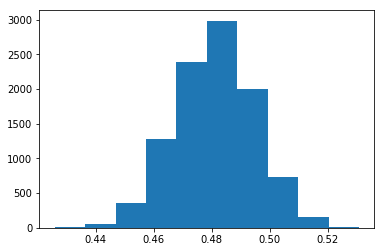

In [11]:
#- plot the histogram of the sampling distribution
plt.hist(proportions)

The value we found in our survey data was 0.411.   How likely do you think
that value is, given the sampling distribution you have just made?